# Reading data from the desktop file system

The goal of this section is to read a "comma separated value" data file from the computer desktop and load it into a usable Python data structure that can be used for further analysis. In this section, we will explore Python tools for reading a text file line-by-line into an array-like `list`, parsing and cleaning the contents of each line, and then converting the line data elements from string types to their corresponding data types.

#### References

 1. Python `with`
    1. [Python 3 reference](https://docs.python.org/3/reference/compound_stmts.html#with) 
    1. A `with` [Anti-pattern](https://docs.quantifiedcode.com/python-anti-patterns/maintainability/not_using_with_to_open_files.html) or when/how `with` should be used.
 1. Python `list`
     1. [Python 3 reference](https://docs.python.org/3.6/library/stdtypes.html#list) and [here](https://docs.python.org/3/tutorial/datastructures.html#more-on-lists)
 1. Python `list comprehension`
     1. The `list comprehension` [Python 3 reference](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions)
 1. Python`array`
     1. [Python 3 reference](https://docs.python.org/3/library/array.html)
     1. *lists* **are not** *arrays* [stackoverflow](https://stackoverflow.com/questions/176011/python-list-vs-array-when-to-use?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa)
 1. Python `dictionary`
     1. [Python 3 reference](https://docs.python.org/3/tutorial/datastructures.html#dictionaries)

### Download and verify our data file `LTER.NIN.DWS.csv` using BASH shell commands.

In [1]:
!curl -s -X GET https://pasta.lternet.edu/package/data/eml/knb-lter-nin/1/1/DailyWaterSample-NIN-LTER-1978-1992 > LTER.NIN.DWS.csv

In [2]:
!head -n 10 ./LTER.NIN.DWS.csv

In [3]:
!tail -n 10 ./LTER.NIN.DWS.csv

In [ ]:
!wc -l ./LTER.NIN.DWS.csv

### Read the data table file `LTER.NIN.DWS.csv`and load into a multi-dimensional Python `list` data structure.

The data file we are using consists of text that is formatted as a "comma separated values" table, with a mixture of column data types, including dates, text, floating point, and interger values. As with most software, Python reads text files a line at a time, as delimitted by the single line feed character `\n`. This line feed is consider white space and should be removed from the end of each line.

Because the file is text, each full line is read and saved as a Python string. In Python 3, strings (or `str`) are composed of Unicode characters. A discussion of Unicode is beyond the scope of this session, but there are plenty of sites on the Internet that provide good information on the subject ([Python 3 reference](https://docs.python.org/3.6/howto/unicode.html?highlight=unicode), [How Python does Unicode](https://www.b-list.org/weblog/2017/sep/05/how-python-does-unicode/), [Pragmatic Unicode, or How do I stop the pain?](https://www.youtube.com/watch?v=sgHbC6udIqc)).

The Python `with` statement creates a context in which scope-bounded execution can occur. Using the `with` statement for file operations is recommended because the file handle will be closed automatically, even if an exception occurs during the read operation.

The commad in the square brackets `[]` is a Python `list comprehension`, which is generally considered to be more efficient than using a `for` statement and it is more compact.

These two commands will generate a Python `list` data structure, but not quite the one we need for data analysis.

In [4]:
with open('./LTER.NIN.DWS.csv', 'r') as f:
    tbl = [_.strip().split(',') for _ in f.readlines()] # <-- list comprehension

In [5]:
type(tbl)

list

In [6]:
len(tbl)

13177

In [7]:
for head in tbl[:9]:
    print(head)

['Date', 'transect', 'water_temp', 'SAL', 'TNW', 'TNF', 'TPW', 'TPF', 'POP', 'NHN', 'NNN', 'CHEM', 'TOC', 'DOC', 'POC']
['9/1/1978', 'TC', '-9.9', '-9.9', '-99.9', '-99.9', '-9.9', '-9.9', '-9.999', '-9.9', '-9.99', '-999', '2', '-9.9', '-9.9']
['9/2/1978', 'TC', '-9.9', '-9.9', '-99.9', '-99.9', '-9.9', '-9.9', '-9.999', '-9.9', '-9.99', '-999', '2', '-9.9', '-9.9']
['9/3/1978', 'TC', '-9.9', '-9.9', '-99.9', '-99.9', '-9.9', '-9.9', '-9.999', '-9.9', '-9.99', '-999', '1', '-9.9', '-9.9']
['9/4/1978', 'TC', '-9.9', '-9.9', '-99.9', '-99.9', '-9.9', '-9.9', '-9.999', '-9.9', '-9.99', '-999', '1', '-9.9', '-9.9']
['9/5/1978', 'TC', '-9.9', '-9.9', '-99.9', '-99.9', '-9.9', '-9.9', '-9.999', '-9.9', '-9.99', '-999', '1', '-9.9', '-9.9']
['9/6/1978', 'TC', '-9.9', '-9.9', '-99.9', '-99.9', '-9.9', '-9.9', '-9.999', '-9.9', '-9.99', '-999', '2', '-9.9', '-9.9']
['9/7/1978', 'TC', '-9.9', '-9.9', '-99.9', '-99.9', '-9.9', '-9.9', '-9.999', '-9.9', '-9.99', '-999', '2', '-9.9', '-9.9']
['9/8

In [8]:
for tail in tbl[-10:]:
    print(tail)

['4/18/1992', 'OL', '18', '34', '27', '15.4', '0.9', '0', '0.175', '0.6', '0.1', '327', '-9.9', '-9.9', '2.4']
['4/19/1992', 'TC', '-9.9', '-9.9', '-9.9', '-9.9', '-9.9', '-9.9', '-9.9', '-9.9', '-9.99', '328', '-9.9', '-9.9', '-9.9']
['4/19/1992', 'CB', '19', '32', '23.4', '14.2', '0.3', '0', '0.141', '1.3', '0.1', '329', '-9.9', '-9.9', '2.6']
['4/19/1992', 'OL', '20', '32', '22.8', '22.6', '0.8', '0', '0.224', '0.9', '0.2', '330', '-9.9', '-9.9', '2.7']
['4/20/1992', 'TC', '-9.9', '-9.9', '-9.9', '-9.9', '-9.9', '-9.9', '-9.9', '-9.9', '-9.99', '331', '-9.9', '-9.9', '-9.9']
['4/20/1992', 'CB', '20', '32', '20.4', '18.2', '0', '0', '0.126', '0.6', '0.1', '332', '-9.9', '-9.9', '2.6']
['4/20/1992', 'OL', '20', '32', '23.6', '21.9', '0.3', '0', '0.174', '1.3', '0.2', '333', '-9.9', '-9.9', '3']
['4/21/1992', 'TC', '-9.9', '-9.9', '-9.9', '-9.9', '-9.9', '-9.9', '-9.9', '-9.9', '-9.99', '334', '-9.9', '-9.9', '-9.9']
['4/21/1992', 'CB', '21', '22', '22.6', '20.5', '0.3', '0.2', '0.17',

In [9]:
header = tbl[0] # Set header from original table
print(header)

['Date', 'transect', 'water_temp', 'SAL', 'TNW', 'TNF', 'TPW', 'TPF', 'POP', 'NHN', 'NNN', 'CHEM', 'TOC', 'DOC', 'POC']


In [10]:
tbl = tbl[1:] # Remove header; extract only string values that represent the real table data
len(tbl)

13176

### Convert the `str` values into the appropriate data types.

For us to use the data contained within this file, each line must be parsed into its respective data tokens and converted into their real data types (e.g., date, float, integer, ...). There are some good Python packages that can guess at the conversion, but we will manually peform this task since we too can make a good guess as to the data types.

The result of this process will be a multi-dimensional Python `list` data structure that holds the data - you can think of this as a 2-dimensional array. When creating this `list` data structure, we can order the table in two ways: 1) row major or 2) column major.

#### Row major order

*Row major order* means that data are ordered in the same way that they were read in from the data file: as a single line consisting of a single data point from each data column that is store in a row-based `list`.

```
[pnt1-col1, pnt1-col2, pnt1-col3, pnt1-col4,...]
[pnt2-col1, pnt2-col2, pnt2-col3, pnt2-col4,...]
.
.
.
[pntN-col1, pntN-col2, pntN-col3, pntN-col4,...]
```

This may seem more natural when processing the data table for printing or examination, but it does not capture the columnar model of the actual table and results in more work when performing downstream analysis of a single data column because you must iterate through each row and select the data point of interest.

In [11]:
# Populate data frame with coerced (converted) values from data table in row-major order

from datetime import datetime

df = []
for line in tbl:
    data = []
    date = datetime.strptime(line[0], '%m/%d/%Y')
    data.append(date)             # Date as datetime
    data.append(line[1])          # transect as unicode string
    data.append(float(line[2]))   # water_temp as float
    data.append(float(line[3]))   # SAL as float
    data.append(float(line[4]))   # TNW as float
    data.append(float(line[5]))   # TNF as float
    data.append(float(line[6]))   # TPW as float
    data.append(float(line[7]))   # TPF as float
    data.append(float(line[8]))   # POP as float
    data.append(float(line[9]))   # NHN as float
    data.append(float(line[10]))  # NNN as float
    data.append(int(line[11]))    # CHEM as integer
    data.append(float(line[12]))  # TOC as float
    data.append(float(line[13]))  # DOC as float
    data.append(float(line[14]))  # POC as float
    df.append(data)

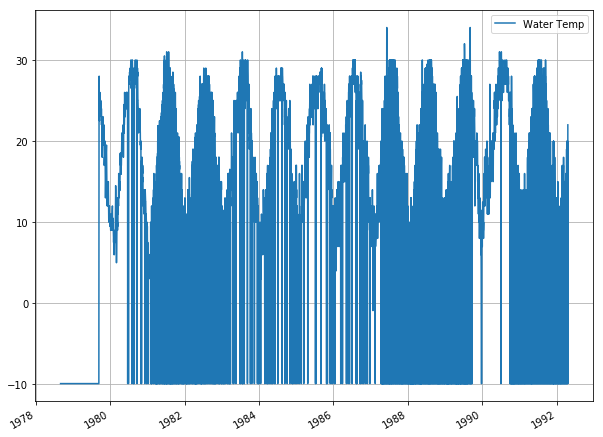

In [13]:
# Access the "Date" and "water_temp" columns and plot the data

import matplotlib
import matplotlib.pyplot as plt

date = []
water_temp = []
for line in df:
    date.append(line[0])
    water_temp.append(line[2])
    
fig, ax = plt.subplots()
ax.plot(date, water_temp, label='Water Temp')
ax.grid(True)
fig.autofmt_xdate()
fig.set_size_inches(10, 8)
plt.legend()
plt.show()

#### Column major order

*Column major order* means that the data are ordered within their respective column structure and can be accessed as a single `list`.

```
[pnt1-col1], [pnt1-col2], [pnt1-col3], [pnt1-col4]...
[pnt2-col1], [pnt2-col2], [pnt2-col3], [pnt2-col4]...
.
.
.
[pntN-col1], [pntN-col2], [pntN-col3], [pntN-col4]...
```

Building the column major order `list` data structure requires minimal effort and results in a much more functional data structure for performing column-based data analysis.

In [14]:
# Populate data frame with coerced (converted) values from data table in column-major order

from datetime import datetime

df = [[], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
for line in tbl:
    date = datetime.strptime(line[0], '%m/%d/%Y')
    df[0].append(date)              # Date as datetime
    df[1].append(line[1])           # transect as unicode string
    df[2].append(float(line[2]))    # water_temp as float
    df[3].append(float(line[3]))    # SAL as float
    df[4].append(float(line[4]))    # TNW as float
    df[5].append(float(line[5]))    # TNF as float
    df[6].append(float(line[6]))    # TPW as float
    df[7].append(float(line[7]))    # TPF as float
    df[8].append(float(line[8]))    # POP as float
    df[9].append(float(line[9]))    # NHN as float
    df[10].append(float(line[10]))  # NNN as float
    df[11].append(int(line[11]))    # CHEM as integer
    df[12].append(float(line[12]))  # TOC as float
    df[13].append(float(line[13]))  # DOC as float
    df[14].append(float(line[14]))  # POC as float


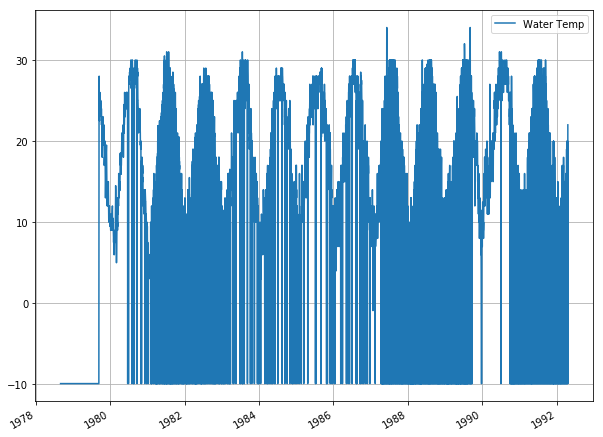

In [15]:
# Access the "Date" and "water_temp" columns and plot the data

import matplotlib
import matplotlib.pyplot as plt

date = df[0]
water_temp = df[2]
    
fig, ax = plt.subplots()
ax.plot(date, water_temp, label='Water Temp')
ax.grid(True)
fig.autofmt_xdate()
fig.set_size_inches(10, 8)
plt.legend()
plt.show()

### Creating a more efficient (storage and speed) data structure using the Python `array` to store data.

Python `array` data structures are closely aligned with the underlying and native "C" data types used in the implementation of the Python language. As such, these data structures are based on true types (not Object types like in Python), so they are much more efficient in storage and can be processed much faster during script execution.

The following code demonstrates how to implement a *column major order* data table similar to the Python `list` data strucutre above. It also uses the Python `dict` data structure, which provides a "key-value" associative capability so that we may refer to our columns using their respective names.

In [16]:
# Define column data structures

import array

Date = []                     # datetime object
transect = []                 # unicode string
water_temp = array.array('d') # double float
SAL = array.array('d')        # double float
TNW = array.array('d')        # double float
TNF = array.array('d')        # double float
TPW = array.array('d')        # double float
TPF = array.array('d')        # double float
POP = array.array('d')        # double float
NHN = array.array('d')        # double float
NNN = array.array('d')        # double float
CHEM = array.array('l')       # signed long
TOC = array.array('d')        # double float
DOC = array.array('d')        # double float
POC = array.array('d')        # double float

In [17]:
# Define an empty data frame data structure as Python dictionary

df = {
    'Date': Date,
    'transect': transect,
    'water_temp': water_temp,
    'SAL': SAL,
    'TNW': TNW,
    'TNF': TNF,
    'TPW': TPW,
    'TPF': TPF,
    'POP': POP,
    'NHN': NHN,
    'NNN': NNN,
    'CHEM': CHEM,
    'TOC': TOC,
    'DOC': DOC,
    'POC': POC
}

In [18]:
# Populate data frame with coerced (converted) values from data table in column-major order

from datetime import datetime

for line in tbl:
    date = datetime.strptime(line[0], '%m/%d/%Y')
    df['Date'].append(date)                  # Date as datetime
    df['transect'].append(line[1])           # transect as unicode string
    df['water_temp'].append(float(line[2]))  # water_temp as float object
    df['SAL'].append(float(line[3]))         # SAL as float object
    df['TNW'].append(float(line[4]))         # TNW as float object
    df['TNF'].append(float(line[5]))         # TNF as float object
    df['TPW'].append(float(line[6]))         # TPW as float object
    df['TPF'].append(float(line[7]))         # TPF as float object
    df['POP'].append(float(line[8]))         # POP as float object
    df['NHN'].append(float(line[9]))         # NHN as float object
    df['NNN'].append(float(line[10]))        # NNN as float object
    df['CHEM'].append(int(line[11]))         # CHEM as integer object
    df['TOC'].append(float(line[12]))        # TOC as float object
    df['DOC'].append(float(line[13]))        # DOC as float object
    df['POC'].append(float(line[14]))        # POC as float object

In [19]:
len(df['CHEM'])

13176

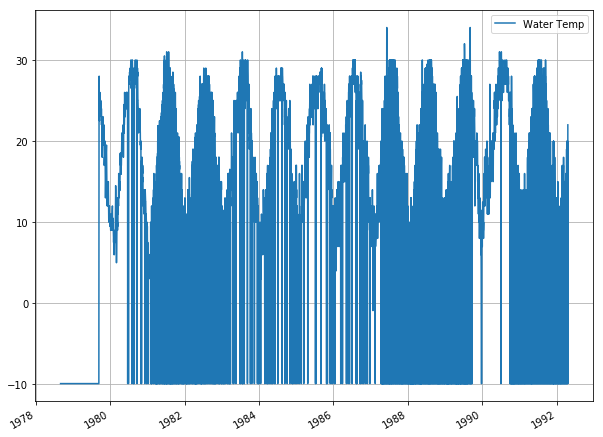

In [20]:
# Access the "Date" and "water_temp" columns and plot the data

import matplotlib
import matplotlib.pyplot as plt

date = df['Date']
water_temp = df['water_temp']
    
fig, ax = plt.subplots()
ax.plot(date, water_temp, label='Water Temp')
ax.grid(True)
fig.autofmt_xdate()
fig.set_size_inches(10, 8)
plt.legend()
plt.show()